In [58]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
print(os.path.abspath('../'))

C:\Users\dell 2\Desktop\CDA


In [59]:
file_path = os.path.abspath('C:\\Users\\dell 2\\Desktop\\CDA\\ML\\Assignment')
print(file_path)

C:\Users\dell 2\Desktop\CDA\ML\Assignment


In [60]:
bank = pd.read_csv(file_path+'/bank-full.csv', ';')

In [61]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [62]:
bank.shape

(45211, 17)

In [63]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [64]:
bank['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [65]:
bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [66]:
from sklearn.preprocessing import StandardScaler
features = ['age', 'balance','day','duration','campaign','pdays','previous']

In [67]:
# Separating Features
x = bank.loc[:, features].values

In [68]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [69]:
# Separating out the target
y = bank.loc[:,['y']].values
y.shape

(45211, 1)

In [70]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [71]:
x.shape

(45211, 7)

In [72]:
x

array([[ 1.60696496,  0.25641925, -1.29847633, ..., -0.56935064,
        -0.41145311, -0.25194037],
       [ 0.28852927, -0.43789469, -1.29847633, ..., -0.56935064,
        -0.41145311, -0.25194037],
       [-0.74738448, -0.44676247, -1.29847633, ..., -0.56935064,
        -0.41145311, -0.25194037],
       ...,
       [ 2.92540065,  1.42959305,  0.14341818, ...,  0.72181052,
         1.43618859,  1.05047333],
       [ 1.51279098, -0.22802402,  0.14341818, ...,  0.39902023,
        -0.41145311, -0.25194037],
       [-0.37068857,  0.52836436,  0.14341818, ..., -0.24656035,
         1.4761376 ,  4.52357654]])

In [73]:
np.mean(x),np.std(x)

(4.8854766476362515e-17, 1.0)

### Principal Component Analysis

In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2','PC 3', 'PC 4', 'PC 5','PC 6', 'PC 7'])

In [75]:
principalDF.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7
0,0.033707,-1.402827,1.025284,-1.075341,-0.778167,0.292582,0.152987
1,0.017589,-0.954478,-0.356871,-1.208935,-0.259824,0.274863,0.218753
2,0.022938,-0.699632,-1.071917,-1.197462,0.499407,0.332147,0.262384
3,0.011669,-0.954774,0.181356,-1.391388,-0.050603,0.248351,0.206882
4,0.051021,-0.912816,-1.085188,-0.811320,0.363598,0.433987,0.252515


In [76]:
BankDF = pd.concat([principalDF, bank[['y']]],axis =1)
BankDF.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,y
0,0.033707,-1.402827,1.025284,-1.075341,-0.778167,0.292582,0.152987,no
1,0.017589,-0.954478,-0.356871,-1.208935,-0.259824,0.274863,0.218753,no
2,0.022938,-0.699632,-1.071917,-1.197462,0.499407,0.332147,0.262384,no
3,0.011669,-0.954774,0.181356,-1.391388,-0.050603,0.248351,0.206882,no
4,0.051021,-0.912816,-1.085188,-0.811320,0.363598,0.433987,0.252515,no


In [77]:
BankDF.tail()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,y
45206,-0.354970,-1.380807,0.457399,2.050007,-1.530170,0.440425,0.016177,yes
45207,-0.425725,-0.933374,1.981891,-0.049643,-1.945222,-0.409690,0.011220,yes
45208,1.585677,-0.955057,3.141306,2.599637,-2.112702,0.934940,-0.549431,yes
45209,-0.559210,-0.422836,0.903406,0.461095,-1.459935,0.206179,0.009495,no
45210,3.956464,1.319285,0.489293,1.091926,0.204648,-0.073111,2.103823,no


In [78]:
# Explained Variance
# How much variance can be attributed to each of the principal component


pca.explained_variance_ratio_

# The first PC has 21.5% of variance in the dataset. 

array([0.21561335, 0.16500204, 0.15671658, 0.1392829 , 0.12820211,
       0.11802298, 0.07716004])

In [79]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.21561335 0.16500204 0.15671658 0.1392829  0.12820211 0.11802298
 0.07716004]


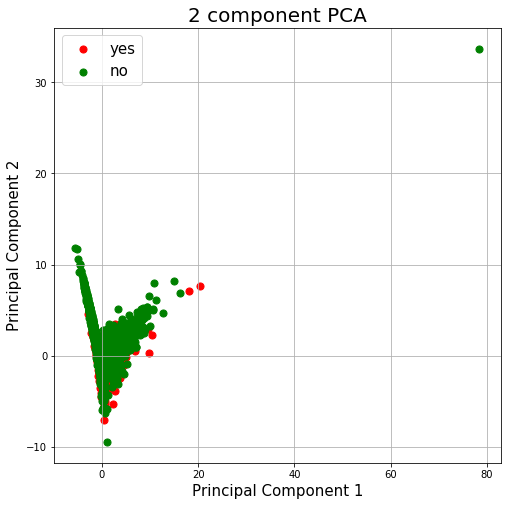

In [80]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['yes', 'no']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = BankDF['y'] == target
    ax.scatter(BankDF.loc[indicesToKeep, 'PC 1']
               , BankDF.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)
plt.legend(targets,prop={'size': 15})
ax.grid()

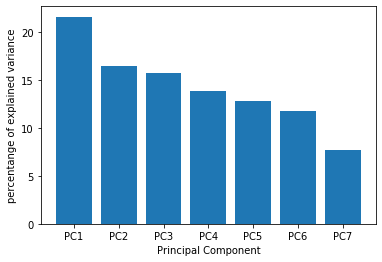

In [81]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('Principal Component')
plt.show()

### Applying PCA

In [82]:
X = bank.loc[:, features].values
X.shape

(45211, 7)

In [83]:
# Spliting dataset into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [84]:
# Normalizing the feature set
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### When PC =1 

In [89]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [90]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators= 20, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

c:\users\dell 2\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [91]:
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[7229  751]
 [ 902  161]]
0.8172066791993807


### PC = 3

In [92]:
X = bank.loc[:, features].values
X.shape

# Spliting dataset into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



# Normalizing the feature set
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [94]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators= 20, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

c:\users\dell 2\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [95]:
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[7764  216]
 [ 857  206]]
0.8813446864978436


### PC = 6

In [96]:
X = bank.loc[:, features].values
X.shape

# Spliting dataset into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



# Normalizing the feature set
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [97]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [98]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators= 20, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

c:\users\dell 2\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [99]:
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(accuracy_score(y_test, y_pred))

[[7747  233]
 [ 801  262]]
0.8856574145748093
